# Caso Ilustrativo

###   Este projeto apresenta o caso ilustrativo abordado no livro "23 Perguntas sobre Aprendizado de Máquina: Regras Práticas para o Desenvolvimento de Aplicações".

### Conjunto de dados "Inadimplência de cartão de crédito". Objetivo: estimar a probabilidade de um cliente deixar de pagar a fatura do cartão.

### Confira na Amazon: 
https://www.amazon.com.br/Perguntas-sobre-Aprendizado-Máquina-Desenvolvimento-ebook/dp/B08PT9TN93/ref=pd_rhf_gw_p_img_1?_encoding=UTF8&psc=1&refRID=YQXS5VBMB09E1EYH4BXE

###  Esse caderno pode levar alguns minutos para ser executado completamente. 

## Análise exploratória dos dados

## Bibliotecas

In [1]:
import os #Interface com o sistema operacional
import pandas as pd #Análise de dados
import numpy as np #Operações numéricas

#Função para divisão de conjunto de dados
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt #Geração de gráficos
import seaborn as sns #Geração de gráficos
#Exibe gráfico durante execução
%matplotlib inline 

# Desliga alertas
import warnings
warnings.filterwarnings("ignore")


## Carregando os dados

In [2]:
#Importação dos dados
meus_dados = pd.read_excel('../dados/default_of_credit_card_clients.xls', skiprows=1)

#Exibe informações do conjunto de dados
meus_dados.info(verbose = True, null_counts = True)

#Exibe as primeiras cinco linhas
meus_dados.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dpnmth       30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnmth
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Divisão do conjunto de dados

In [3]:
#Separa conjunto de entrada
X = meus_dados.iloc[0:,1:-1]
#Separa variável alvo
y = meus_dados.iloc[0:,24]
#Obtém conjunto de teste
X_trains, X_test, y_trains, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Obtém conjunto de treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_trains, y_trains, test_size=0.2, random_state=42)

## Análise dos atributos categóricos

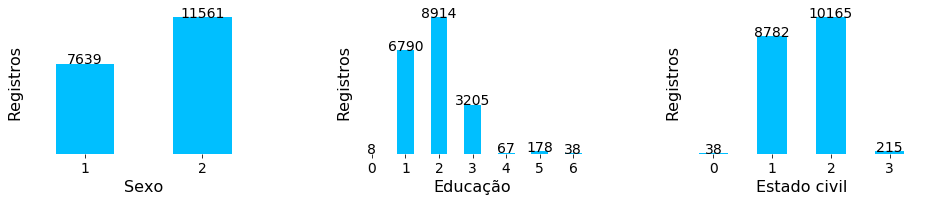

In [4]:
#Relação dos atributos categóricos
rotulo_col = ["SEX", "EDUCATION", "MARRIAGE"]
#Relação dos nomes dos atributos categóricos em português 
rotulo_eixo = ["Sexo", "Educação", "Estado civil" ]

#Cria nova figura
fig = plt.figure()
#Harmoniza a disposição dos gráficos
fig.subplots_adjust(hspace=0.4, wspace=0.4)
#Percorre a relação de atributos 
for k, rot_col in enumerate(rotulo_col):
    #Adiciona eixos em um arranjo de gráficos
    ax = fig.add_subplot(3, 3, k+1)
    #Remove quadro do gráfico
    ax.set(frame_on=False)
    #Remove os traços do eixo y
    ax.yaxis.set_major_locator(plt.NullLocator())
    #Nomeia eixo x
    plt.xlabel(rotulo_eixo[k],fontsize=16)
    #Nomeia eixo y
    plt.ylabel("Registros",fontsize=16)
    #Percorre cada valor do atributo categórico
    for i,j in enumerate(X_train[rot_col].value_counts().sort_index()):
        #Insere quantidade acima da barra
        ax.text(i, j+5, str(j),horizontalalignment="center",fontsize=14)
    
    #Desenha gráfico de barras
    X_train[rot_col].value_counts().sort_index().plot(kind="bar",colors="deepskyblue",figsize=(16, 10), grid = False, rot=1, fontsize=14, width=0.5 )

## Análise atributos numéricos

### Limite de crédito e Idade

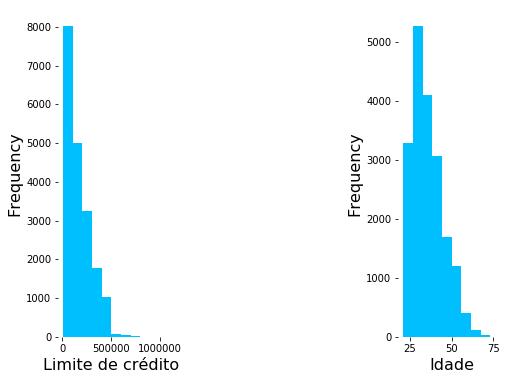

In [5]:
#Relação dos atributos numéricos
rotulo_col2 = ["LIMIT_BAL", "AGE" ]
#Relação dos nomes dos atributos numéricos em português
rotulo_eixo2 = ["Limite de crédito", "Idade"]
#Cria nova figura
fig = plt.figure()
#Harmoniza a disposição dos gráficos
fig.subplots_adjust(hspace=0.4, wspace=2.2)
#Percorre a relação de atributos
for k, rot_col in enumerate(rotulo_col2):
    #Adiciona eixos em um arranjo de gráficos
    ax = fig.add_subplot(1, 2, k+1)
    #Remove quadro do gráfico
    ax.set(frame_on=False)
    #Nomeia eixo x
    plt.xlabel(rotulo_eixo2[k],fontsize=16)
    #Nomeia eixo y
    plt.ylabel("Frequência",fontsize=16)
    #Desenha histograma
    X_train[rot_col].plot(kind="hist",figsize=(8, 6), grid = False, color = "deepskyblue")

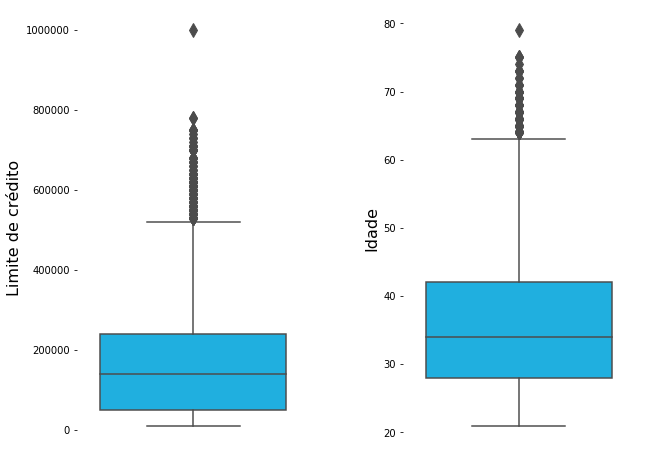

In [6]:
#Cria nova figura
fig = plt.figure(figsize=(10, 8))
#Harmoniza a disposição dos gráficos
fig.subplots_adjust(hspace=0.4, wspace=0.4)
#Percorre a relação de atributos
for k, rot_col in enumerate(rotulo_col2):
    #Adiciona eixos em um arranjo de gráficos
    ax = fig.add_subplot(1, 2, k+1)
    #Remove quadro do gráfico
    ax.set(frame_on=False)
    #Desenha diagrama de caixa
    sns.boxplot(x= rot_col, data=X_train, color="deepskyblue", orient= 'v', fliersize = 10 )
    #Nomeia eixo y
    ax.set_ylabel(ylabel= rotulo_eixo2[k],fontsize=16)
    #Remove marcações do eixo x
    ax.xaxis.set_major_locator(plt.NullLocator())
    

### Valores discrepantes

In [7]:
#Importa função estatística para o cálculo de medcouple
from statsmodels.stats.stattools import medcouple 

#Define atributos para análise
atributes = rotulo_col2
#Percorre relação de atributos
for k, atr in enumerate(atributes):
    #Calcula o terceiro quartil
    Q3 = X_train[atr].quantile(q=0.75)
    #Calcula o primeiro quartil
    Q1 = X_train[atr].quantile(q=0.25)
    #Calcula o intervalo entre quartis
    IQR = Q3 - Q1
    #Coleta amostra de dados
    atr_samp = X_train[atr].sample(n=5000, random_state=42)
    #Calcula medcouple
    MC = medcouple(atr_samp)
    #Exibe os valores considerados discrepantes pelo diagrama de caixa ajustado
    print("Atributo: ", rotulo_eixo2[k])
    outlier_acima = X_train[X_train[atr] >  (Q3 + 1.5*IQR*np.exp(3*MC))]
    print("Valores discrepantes acima:")
    print(outlier_acima[atr])
    outlier_abaixo = X_train[X_train[atr] <  (Q1 - 1.5*IQR*np.exp(-4*MC))]
    print("Valores discrepantes abaixo:")
    print(outlier_abaixo[atr])

Atributo:  Limite de crédito
Valores discrepantes acima:
28715     780000
2197     1000000
24320     780000
Name: LIMIT_BAL, dtype: int64
Valores discrepantes abaixo:
Series([], Name: LIMIT_BAL, dtype: int64)
Atributo:  Idade
Valores discrepantes acima:
18245    79
Name: AGE, dtype: int64
Valores discrepantes abaixo:
Series([], Name: AGE, dtype: int64)


### Situação de pagamento

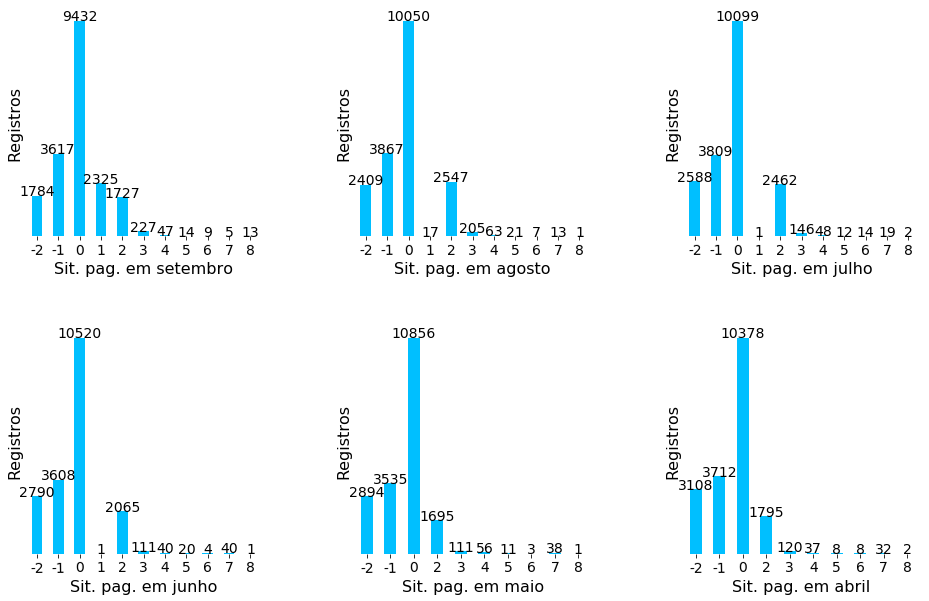

In [8]:
#Relação dos atributos numéricos
rotulo_col3 = [ "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
#Relação dos nomes dos atributos numéricos em português
rotulo_eixo3 = [ "Sit. pag. em setembro", "Sit. pag. em agosto",
              "Sit. pag. em julho", "Sit. pag. em junho", "Sit. pag. em maio", "Sit. pag. em abril" ]
#Cria nova figura
fig = plt.figure()
#Harmoniza a disposição dos gráficos
fig.subplots_adjust(hspace=0.4, wspace=0.4)
#Percorre a relação de atributos
for k, rot_col in enumerate(rotulo_col3):
    #Adiciona eixos em um arranjo de gráficos
    ax = fig.add_subplot(2, 3, k+1)
    #Remove quadro do gráfico
    ax.set(frame_on=False)
    #Remove os traços do eixo y
    ax.yaxis.set_major_locator(plt.NullLocator())
    #Nomeia eixo x
    plt.xlabel(rotulo_eixo3[k],fontsize=16)
    #Nomeia eixo y
    plt.ylabel("Registros",fontsize=16)
    #Percorre cada valor do atributo
    for i,j in enumerate(X_train[rot_col].value_counts().sort_index()):
        #Insere quantidade acima da barra
        ax.text(i, j+5, str(j),horizontalalignment="center",fontsize=14)
    #Desenha gráfico de barras
    X_train[rot_col].value_counts().sort_index().plot(kind="bar",colors="deepskyblue",figsize=(16, 10), grid = False, rot=1, 
                                                 fontsize=14, width=0.5 )

### Extrato da conta

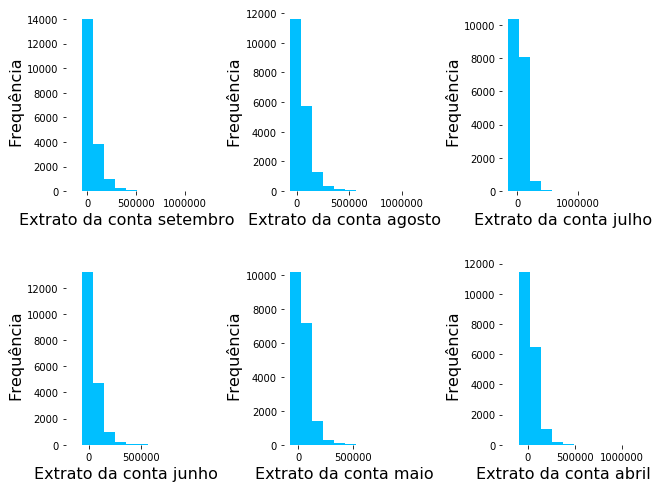

In [9]:
#Relação dos atributos numéricos
rotulo_col4 = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
#Relação dos nomes dos atributos numéricos em português
rotulo_eixo4 = [ 'Extrato da conta setembro', 'Extrato da conta agosto', 'Extrato da conta julho', 'Extrato da conta junho'
               , 'Extrato da conta maio', 'Extrato da conta abril']
#Cria nova figura
fig = plt.figure()
#Harmoniza a disposição dos gráficos
fig.subplots_adjust(hspace=0.4, wspace=0.8)
#Percorre a relação de atributos
for k, rot_col in enumerate(rotulo_col4):
    #Adiciona eixos em um arranjo de gráficos
    ax = fig.add_subplot(2, 3, k+1)
    #Remove quadro do gráfico
    ax.set(frame_on=False)
    #Desenha histograma
    X_train[rot_col].plot(kind='hist',figsize=(10, 8), grid = False, color = 'deepskyblue')
    #Nomeia eixo x
    plt.xlabel(rotulo_eixo4[k],fontsize=16)
    #Nomeia eixo y
    plt.ylabel("Frequência",fontsize=16)

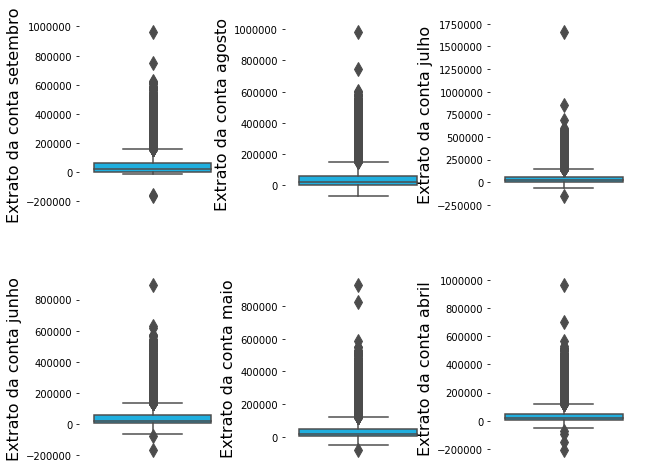

In [10]:
#Cria nova figura
fig = plt.figure(figsize=(10, 8))
#Harmoniza a disposição dos gráficos
fig.subplots_adjust(hspace=0.4, wspace=0.4)
#Percorre a relação de atributos
for k, rot_col in enumerate(rotulo_col4):
    #Adiciona eixos em um arranjo de gráficos
    ax = fig.add_subplot(2, 3, k+1)
    #Remove quadro do gráfico
    ax.set(frame_on=False)
    #Desenha diagrama de caixa
    sns.boxplot(x= rot_col, data=X_train, color='deepskyblue', orient= 'v', fliersize = 10 )
    #Nomeia eixo y
    ax.set_ylabel(ylabel= rotulo_eixo4[k],fontsize=16)
    #Remove marcações do eixo x
    ax.xaxis.set_major_locator(plt.NullLocator())

### Valores discrepantes

In [11]:
#Define atributos para análise
atributes = rotulo_col4
#Percorre relação de atributos
for k, atr in enumerate(atributes):
    #Calcula o terceiro quartil
    Q3 = X_train[atr].quantile(q=0.75)
    #Calcula o primeiro quartil
    Q1 = X_train[atr].quantile(q=0.25)
    #Calcula o intervalo entre quartis
    IQR = Q3 - Q1
    #Coleta amostra de dados
    atr_samp = X_train[atr].sample(n=5000, random_state=42)
    #Calcula medcouple
    MC = medcouple(atr_samp)
    #Exibe os valores considerados discrepantes pelo diagrama de caixa ajustado
    print("Atributo: ", rotulo_eixo4[k])
    outlier_acima = X_train[X_train[atr] >  (Q3 + 1.5*IQR*np.exp(3*MC))]
    print("Valores discrepantes acima:")
    print(outlier_acima[atr].describe())
    outlier_abaixo = X_train[X_train[atr] <  (Q1 - 1.5*IQR*np.exp(-4*MC))]
    print("Valores discrepantes abaixo:")
    print(outlier_abaixo[atr].describe())

Atributo:  Extrato da conta setembro
Valores discrepantes acima:
count        18.000000
mean     607746.611111
std      101211.730922
min      533142.000000
25%      562717.500000
50%      581123.500000
75%      609047.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64
Valores discrepantes abaixo:
count         5.000000
mean     -71269.000000
std       81365.739897
min     -165580.000000
25%     -154973.000000
50%      -15308.000000
75%      -10682.000000
max       -9802.000000
Name: BILL_AMT1, dtype: float64
Atributo:  Extrato da conta agosto
Valores discrepantes acima:
count        38.000000
mean     546285.315789
std       88399.566806
min      481382.000000
25%      496716.500000
50%      528464.500000
75%      560508.500000
max      983931.000000
Name: BILL_AMT2, dtype: float64
Valores discrepantes abaixo:
count       13.000000
mean    -22797.769231
std      15932.057124
min     -69777.000000
25%     -24704.000000
50%     -18618.000000
75%     -14115.000000
max      -89

### Pagamento prévio

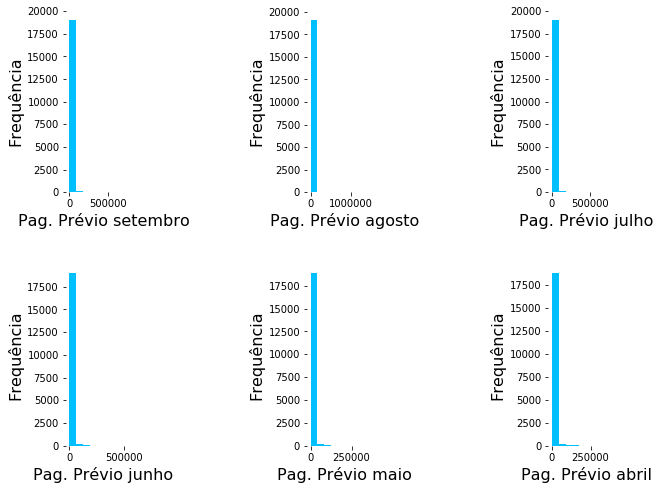

In [12]:
#Relação dos atributos numéricos
rotulo_col5 = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
#Relação dos nomes dos atributos numéricos em português
rotulo_eixo5 = [ 'Pag. Prévio setembro', 'Pag. Prévio agosto', 'Pag. Prévio julho', 'Pag. Prévio junho'
               , 'Pag. Prévio maio', 'Pag. Prévio abril']
#Cria nova figura
fig = plt.figure()
#Harmoniza a disposição dos gráficos
fig.subplots_adjust(hspace=0.4, wspace=2.2)
#Percorre a relação de atributos
for k, rot_col in enumerate(rotulo_col5):
    #Adiciona eixos em um arranjo de gráficos
    ax = fig.add_subplot(2, 3, k+1)
    #Remove quadro do gráfico
    ax.set(frame_on=False)
    #Desenha histograma
    X_train[rot_col].plot(kind='hist',figsize=(10, 8), grid = False, color = 'deepskyblue')
    #Nomeia eixo x
    plt.xlabel(rotulo_eixo5[k],fontsize=16)
    #Nomeia eixo y
    plt.ylabel("Frequência",fontsize=16)

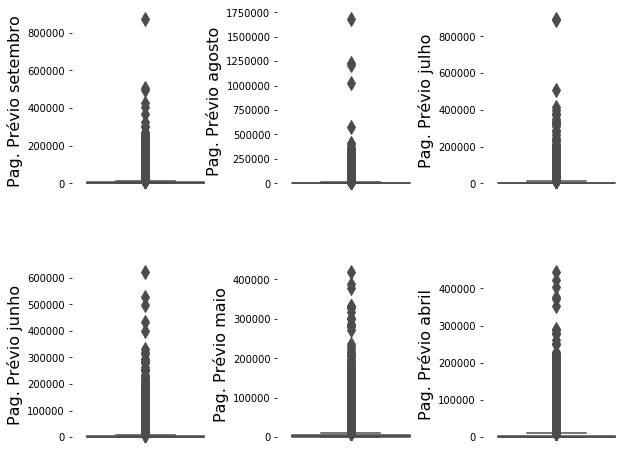

In [13]:
#Cria nova figura
fig = plt.figure(figsize=(10, 8))
#Harmoniza a disposição dos gráficos
fig.subplots_adjust(hspace=0.4, wspace=0.4)
#Percorre a relação de atributos
for k, rot_col in enumerate(rotulo_col5):
    #Adiciona eixos em um arranjo de gráficos
    ax = fig.add_subplot(2, 3, k+1)
    #Remove quadro do gráfico
    ax.set(frame_on=False)
    #Desenha diagrama de caixa
    sns.boxplot(x= rot_col, data=X_train, color='deepskyblue', orient= 'v', fliersize = 10 )
    #Nomeia eixo y
    ax.set_ylabel(ylabel= rotulo_eixo5[k],fontsize=16)
    #Remove marcações do eixo x
    ax.xaxis.set_major_locator(plt.NullLocator())

### Valores discrepantes

In [14]:
#Define atributos para análise
atributes = rotulo_col5
#Percorre relação de atributos
for k, atr in enumerate(atributes):
    #Calcula o terceiro quartil
    Q3 = X_train[atr].quantile(q=0.75)
    #Calcula o primeiro quartil
    Q1 = X_train[atr].quantile(q=0.25)
    #Calcula o intervalo entre quartis
    IQR = Q3 - Q1
    #Coleta amostra de dados
    atr_samp = X_train[atr].sample(n=5000, random_state=42)
    #Calcula medcouple
    MC = medcouple(atr_samp)
    #Exibe os valores considerados discrepantes pelo diagrama de caixa ajustado
    print("Atributo: ", rotulo_eixo5[k])
    outlier_acima = X_train[X_train[atr] >  (Q3 + 1.5*IQR*np.exp(3*MC))]
    print("Valores discrepantes acima:")
    print(outlier_acima[atr].describe())
    outlier_abaixo = X_train[X_train[atr] <  (Q1 - 1.5*IQR*np.exp(-4*MC))]
    print("Valores discrepantes abaixo:")
    print(outlier_abaixo[atr].describe())

Atributo:  Pag. Prévio setembro
Valores discrepantes acima:
count       448.000000
mean      84488.305804
std       75013.809527
min       34241.000000
25%       44119.250000
50%       60421.000000
75%       93692.750000
max      873552.000000
Name: PAY_AMT1, dtype: float64
Valores discrepantes abaixo:
count    3728.000000
mean       11.735247
std        45.234439
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       268.000000
Name: PAY_AMT1, dtype: float64
Atributo:  Pag. Prévio agosto
Valores discrepantes acima:
count    5.520000e+02
mean     8.796569e+04
std      1.235888e+05
min      2.998900e+04
25%      3.739400e+04
50%      5.213000e+04
75%      1.000000e+05
max      1.684259e+06
Name: PAY_AMT2, dtype: float64
Valores discrepantes abaixo:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: PAY_AMT2, dtype: float64
Atributo:  Pag. Prévio julho
Valores discrepantes acima:
count      

## Correlação entre os atributos numéricos

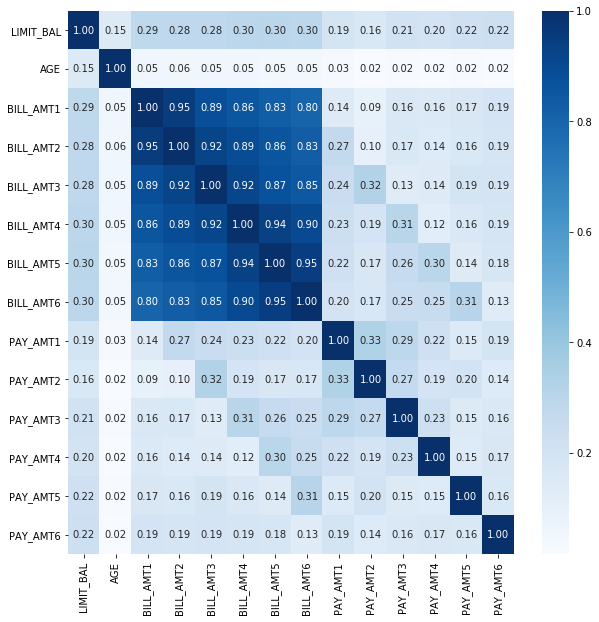

In [15]:
#Cria lista com todos os atributos numéricos
list_atr_num_col = rotulo_col2 + rotulo_col4 + rotulo_col5

#Define tamanho da figura
fig, ax = plt.subplots(figsize=(10,10))
#Desenha mapa de calor
sns.heatmap(X_train[list_atr_num_col].corr(), annot=True, ax=ax, fmt=".2f",
        xticklabels=X_train[list_atr_num_col].corr().columns,
        yticklabels=X_train[list_atr_num_col].corr().columns, cmap='Blues')

# Análise da variável alvo

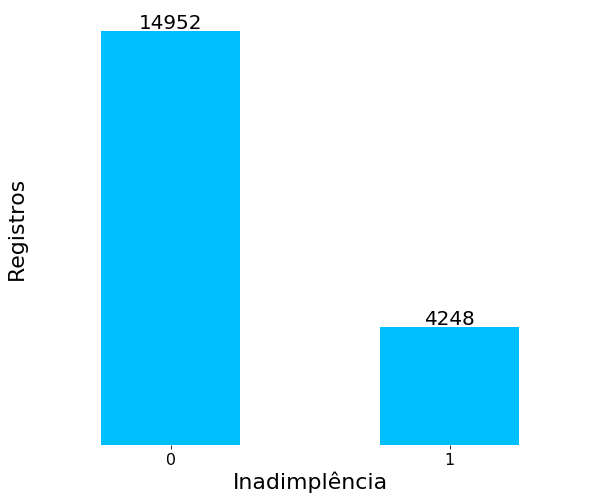

In [16]:
#Cria nova figura
fig, ax = plt.subplots()
#Desenha gráfico de barras
y_train.value_counts().sort_index().plot(kind="bar",figsize=(10, 8), grid = False, color = "deepskyblue", rot=1, fontsize=16)
#Nomeia eixo x
plt.xlabel("Inadimplência",fontsize=22)
#Nomeia eixo y
plt.ylabel("Registros",fontsize=22)
#Remove quadro do gráfico
ax.set(frame_on=False)
#Remove os traços do eixo y
ax.yaxis.set_major_locator(plt.NullLocator())
#Percorre cada valor da variável alvo
for i,j in enumerate(y_train.value_counts().sort_index()):
    #Insere quantidade acima da barra
    ax.text(i, j+100, str(j),horizontalalignment="center",fontsize=20)

# Análise dos atributos com relação à variável alvo

## Atributos categóricos

## Sexo, Educação e Estado civil

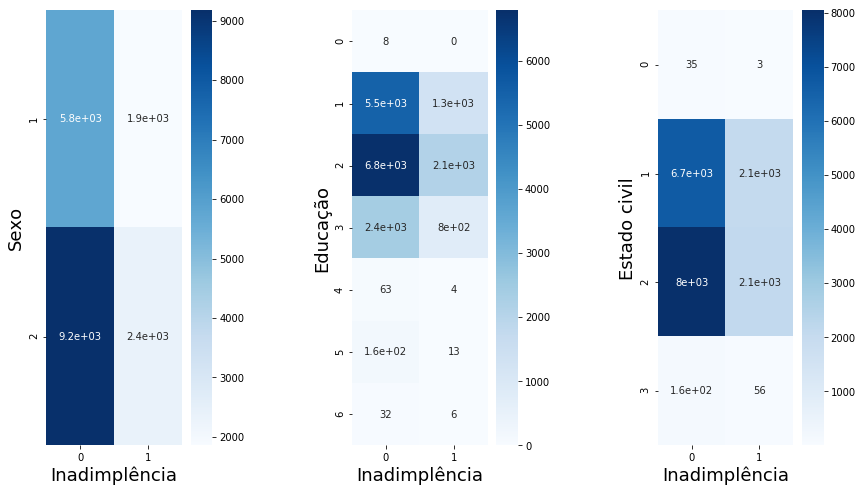

In [17]:
#Concatena os atributos e a variável alvo
Xy_train = pd.concat([X_train, y_train], axis=1, sort=False)
#Cria figura
fig = plt.figure(figsize=(14, 8))
#Harmoniza a disposição dos gráficos 
fig.subplots_adjust(hspace=0.8, wspace=0.8)
#Percorre a relação de atributos
for k, rot_col in enumerate(rotulo_col):
    #Adiciona eixos em um arranjo de gráficos
    ax = fig.add_subplot(1, 3, k+1)
    #Constrói tabela de contingência
    df_cross=pd.crosstab(Xy_train[rot_col],Xy_train['dpnmth'], margins=False)
    #Desenha mapa de calor
    sns.heatmap(df_cross, annot=True, cmap='Blues')
    #Nomeia eixo x
    plt.xlabel("Inadimplência",fontsize=18)
    #Nomeia eixo y
    plt.ylabel(rotulo_eixo[k],fontsize=18)

## Atributos numéricos

## Limite de crédito e Idade

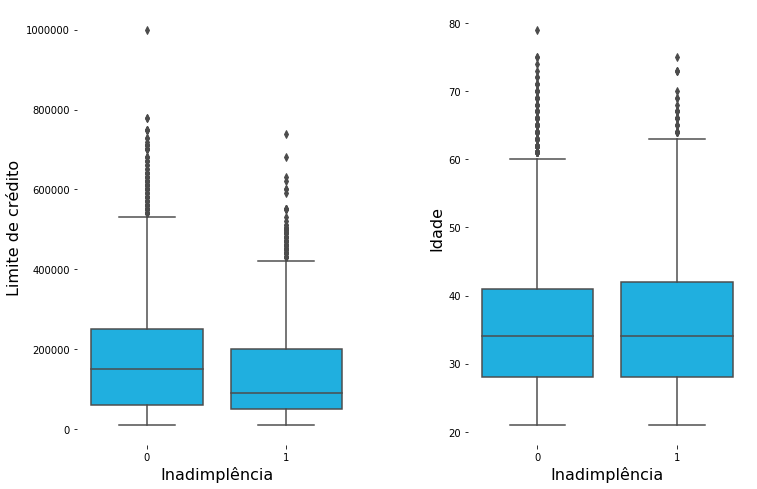

In [18]:
#Cria nova figura
fig = plt.figure(figsize=(12, 8))
#Harmoniza a disposição dos gráficos
fig.subplots_adjust(hspace=0.4, wspace=0.4)
#Percorre a relação de atributos
for k, rot_col in enumerate(rotulo_col2):
    #Adiciona eixos em um arranjo de gráficos
    ax = fig.add_subplot(1, 2, k+1)
    #Remove quadro do gráfico
    ax.set(frame_on=False)
    #Desenha diagrama de caixa
    sns.boxplot(x= 'dpnmth' , y=rot_col, data=Xy_train, color='deepskyblue' )
    #Nomeia eixo x
    ax.set_xlabel(xlabel= "Inadimplência",fontsize=16)
    #Nomeia eixo y
    ax.set_ylabel(ylabel= rotulo_eixo2[k] ,fontsize=16)

## Situação de pagamento

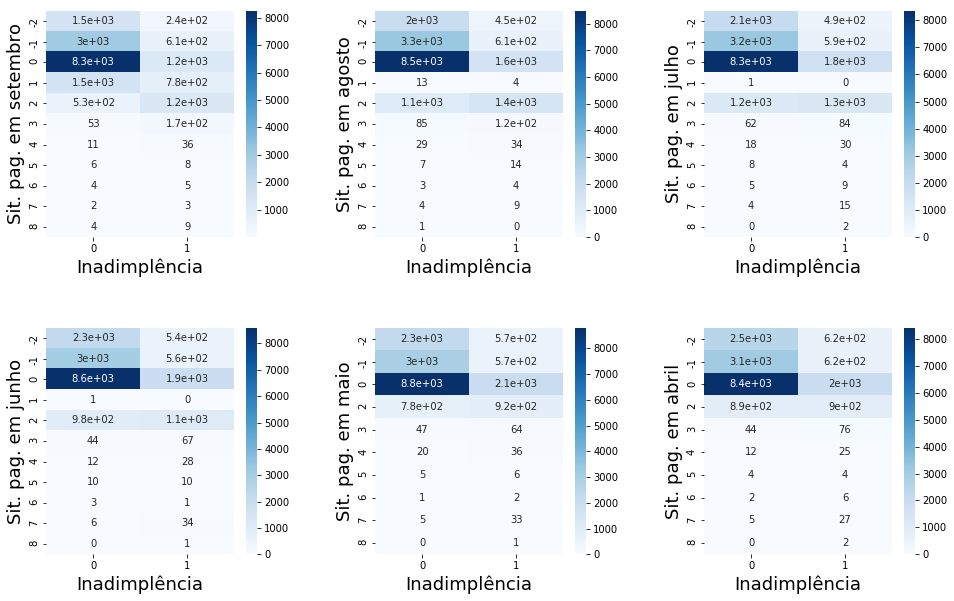

In [19]:
#Cria figura
fig = plt.figure(figsize=(16, 10))
#Harmoniza a disposição dos gráficos
fig.subplots_adjust(hspace=0.4, wspace=0.4)
#Percorre a relação de atributos
for k, rot_col in enumerate(rotulo_col3):
    #Adiciona eixos em um arranjo de gráficos
    ax = fig.add_subplot(2, 3, k+1)
    #Constrói tabela de contingência
    df_cross=pd.crosstab(Xy_train[rot_col],Xy_train['dpnmth'], margins=False)
    #Desenha mapa de calor
    sns.heatmap(df_cross, annot=True, cmap='Blues')
    #Nomeia eixo x
    plt.xlabel("Inadimplência",fontsize=18)
    #Nomeia eixo y
    plt.ylabel(rotulo_eixo3[k],fontsize=18)  

## Extrato de conta

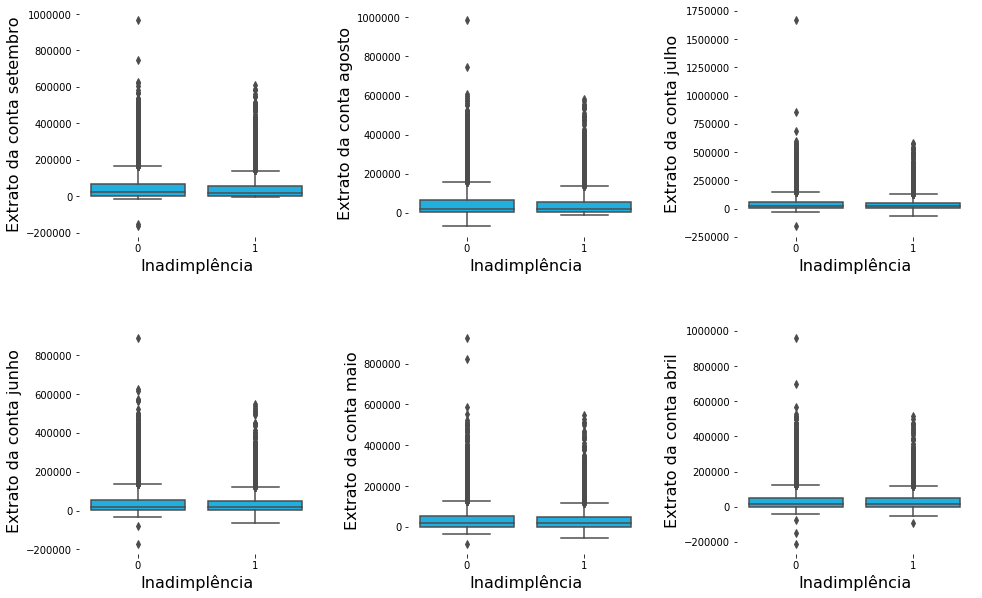

In [20]:
#Cria nova figura
fig = plt.figure(figsize=(16, 10))
#Harmoniza a disposição dos gráficos
fig.subplots_adjust(hspace=0.4, wspace=0.4)
#Percorre a relação de atributos
for k, rot_col in enumerate(rotulo_col4):
    #Adiciona eixos em um arranjo de gráficos
    ax = fig.add_subplot(2, 3, k+1)
    #Remove quadro do gráfico
    ax.set(frame_on=False)
    #Desenha diagrama de caixa
    sns.boxplot(x= "dpnmth" , y=rot_col, data=Xy_train, color="deepskyblue" )
    #Nomeia eixo x
    ax.set_xlabel(xlabel= "Inadimplência" ,fontsize=16)
    #Nomeia eixo y
    ax.set_ylabel(ylabel= rotulo_eixo4[k],fontsize=16)

## Pagamento prévio

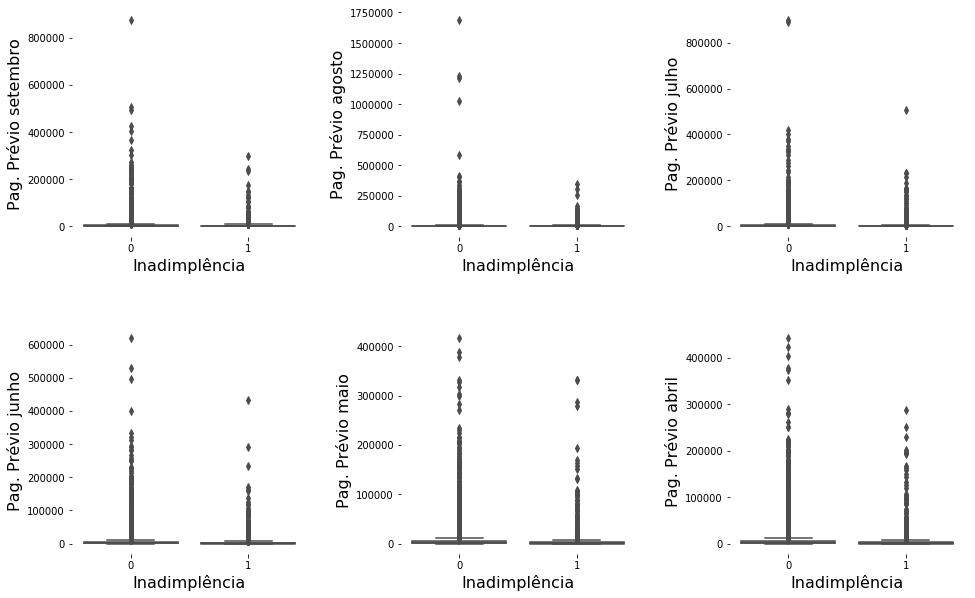

In [21]:
#Cria nova figura
fig = plt.figure(figsize=(16, 10))
#Harmoniza a disposição dos gráficos
fig.subplots_adjust(hspace=0.4, wspace=0.4)
#Percorre a relação de atributos
for k, rot_col in enumerate(rotulo_col5):
    #Adiciona eixos em um arranjo de gráficos
    ax = fig.add_subplot(2, 3, k+1)
    #Remove quadro do gráfico
    ax.set(frame_on=False)
    #Desenha diagrama de caixa
    sns.boxplot(x= "dpnmth" , y=rot_col, data=Xy_train, color="deepskyblue" )
    #Nomeia eixo x
    ax.set_xlabel(xlabel= "Inadimplência",fontsize=16)
    #Nomeia eixo y
    ax.set_ylabel(ylabel= rotulo_eixo5[k] ,fontsize=16)

# Modelagem

## Bibliotecas

In [22]:
#Carrega a função do algoritmo de Floresta Aleatória para classificação
from sklearn.ensemble import RandomForestClassifier
#Carrega função para cálculo da métrica AUC
from sklearn.metrics import roc_auc_score
#Carrega função para elaboração da curva ROC 
from sklearn.metrics import roc_curve
#Pacote para geração de números aleatórios
import random

# Subamostragem dos dados

## Treino

In [23]:
#Separa classe 0
df_class_0 = y_train[y_train == 0]
#Separa classe 1
df_class_1 = y_train[y_train == 1]
#Coleta amostra da classe 0 com tamanho igual ao da classe 1
df_class_0_under = df_class_0.sample(df_class_1.count(), random_state=42)
#Faz concatenação das duas classes
y_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)
#Embaralha os elementos
y_train_under = y_train_under.sample(frac=1,random_state=42)
#Coleta valores de entrada de acordo com a variável alvo
X_train_under = X_train.loc[y_train_under.index, ]

# Otimização

In [24]:
#Fixa semente para geração de números aleatórios
random.seed(405)
#Cria quadro de variáveis para os resultados da otimização
df_results =  pd.DataFrame(columns=["n_arv", "t_am", "t_no", "n_atr","c_rep", "AUC_treino", 
                                    "AUC_val", "Modelo"])
#Realiza 60 iterações
for i in range(60):
    #Hiperparâmetros
    #Número de árvores
    n_arv = random.choice(range(100,1001))
    #Critério de repartição
    c_rep = random.choice(["gini", "entropy"])
    #Número de atributos
    n_atr = random.choice(range(1,len(X_train_under.columns)+1))
    #Tamanho do nó
    t_no = round( (0.2*len(y_train_under))**random.random() )
    #Tamanho da amostra
    t_am = random.choice(range(round(0.2*len(y_train_under)),round(0.9*len(y_train_under))))
    
    #Configuração do algoritmo
    RFc = RandomForestClassifier(n_estimators=n_arv, criterion=c_rep,  max_features=n_atr, 
                                 min_samples_leaf=t_no,  max_samples=t_am, random_state=42)
    #Modelagem
    RFc.fit(X_train_under, y_train_under)
    #Previsão para conjunto de treino
    y_pred_score_treino = RFc.predict_proba(X_train_under)
    #Previsão para conjunto de validação
    y_pred_score_val = RFc.predict_proba(X_val)
    #AUC para conjunto de treino
    AUC_treino = roc_auc_score(y_train_under, y_pred_score_treino[:,1])
    #AUC para conjunto de validação
    AUC_val = roc_auc_score(y_val, y_pred_score_val[:,1])
    #Prepara estrutura para inserção no quadro de variáveis de resultados
    row_df = { "n_arv": n_arv , "t_am": t_am, "t_no": t_no, "n_atr": n_atr,
              "c_rep": c_rep , "AUC_treino": AUC_treino, "AUC_val": AUC_val, "Modelo": i}
    #Inserção de nova linha no quadro de variáveis de resultados
    df_results = df_results.append(row_df, ignore_index=True)
    
 
#Coloca em ordem decrescente os resultados do processo de otimização
table_results = df_results.sort_values(by=['AUC_val'], ascending=False)
#Exibe os melhores resultados
table_results.head(5)

,n_arv,t_am,t_no,n_atr,c_rep,AUC_treino,AUC_val,Modelo
18,787,3362,11,9,gini,0.867389,0.774069,18
54,511,4740,34,7,entropy,0.825719,0.773761,54
59,318,6781,15,5,entropy,0.877709,0.773528,59
15,260,2126,4,4,gini,0.885186,0.773394,15
6,591,7288,19,8,gini,0.870347,0.773125,6


# Importância dos atributos

<BarContainer object of 23 artists>

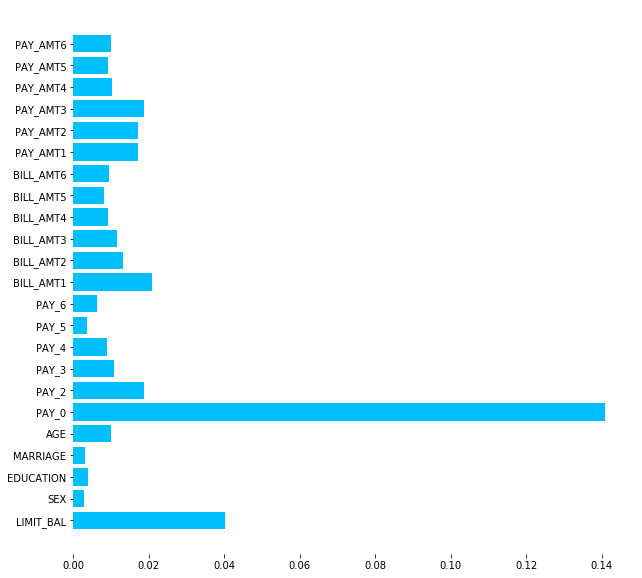

In [25]:
#Carrega função para medir importância dos atributos por permutação
from sklearn.inspection import permutation_importance

#Número de árvores
n_arv = table_results.iloc[0,0]
#Critério de repartição
c_rep = table_results.iloc[0,4]
#Número de atributos
n_atr = table_results.iloc[0,3]
#Tamanho do nó
t_no = table_results.iloc[0,2]
#Tamanho da amostra
t_am = table_results.iloc[0,1]

#Configuração do algoritmo
RF_ot = RandomForestClassifier(n_estimators=n_arv, criterion=c_rep,  max_features=n_atr, 
                                 min_samples_leaf=t_no,  max_samples=t_am, random_state=42)
#Modelagem
RF_ot.fit(X_train_under, y_train_under)

#Verificação da importância dos atributos
result_RF_ot = permutation_importance(RF_ot, X_train_under, y_train_under, scoring = "roc_auc", random_state=42)

#Cria figura
fig = plt.figure(figsize=(10,10))
#Cria objeto de eixos
ax = plt.axes()
#remove contorno
ax.set(frame_on=False)
#Desenha gráfico de barras horizontais com o grau de importância dos atributos
plt.barh(X_train_under.columns, result_RF_ot.importances_mean, color="deepskyblue" )

# Viés

## Idade

In [26]:
#Carrega função para criar uma matriz de confusão
from sklearn.metrics import confusion_matrix

#Separa os exemplos com idade maior que 60 anos no conjunto de validação
X_idoso = X_val[X_val["AGE"] > 60]

#Separa os exemplos com idade maior que 60 anos no conjunto de validação
y_val_idoso = y_val[X_val["AGE"] > 60]

#Previsão para conjunto de validação
y_pred_idoso = RF_ot.predict(X_idoso)

#Matriz de confusão
mat_conf = confusion_matrix(y_val_idoso, y_pred_idoso)

#Taxa de falso positivo
FPR = mat_conf[0,1] / (mat_conf[0,1] + mat_conf[0,0])

print("Taxa de falso positivo idosos")
print(FPR)

#Taxa de falso negativo
FNR = mat_conf[1,0] / (mat_conf[1,0] + mat_conf[1,1])

print("Taxa de falso negativo idosos")
print(FNR)

#Separa os exemplos com idade maior que 60 anos no conjunto de validação
X_nao_idoso = X_val[X_val["AGE"] < 60]

#Separa os exemplos com idade maior que 60 anos no conjunto de validação
y_val_nao_idoso = y_val[X_val["AGE"] < 60]

#Previsão para conjunto de validação
y_pred_nao_idoso = RF_ot.predict(X_nao_idoso)

#Matriz de confusão
mat_conf = confusion_matrix(y_val_nao_idoso, y_pred_nao_idoso)


#Taxa de falso positivo
FPR = mat_conf[0,1] / (mat_conf[0,1] + mat_conf[0,0])

print("Taxa de falso positivo não idosos")
print(FPR)

#Taxa de falso negativo
FNR = mat_conf[1,0] / (mat_conf[1,0] + mat_conf[1,1])

print("Taxa de falso negativo não idosos")
print(FNR)

Taxa de falso positivo idosos
0.25
Taxa de falso negativo idosos
0.5
Taxa de falso positivo não idosos
0.2096424702058505
Taxa de falso negativo não idosos
0.3747645951035782


Text(0.5, 0, 'Taxa de falso positivo')

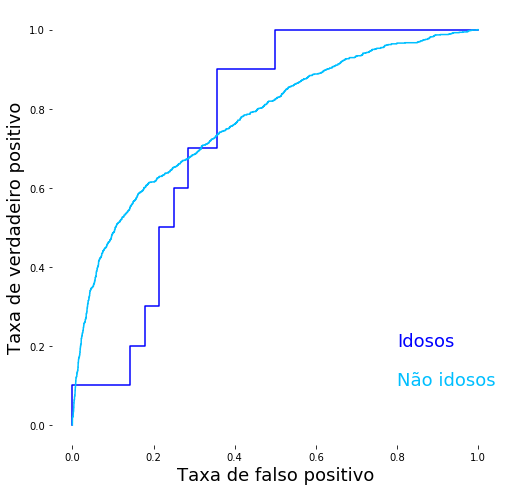

In [27]:
#Realiza previsão de probabilidade para cada exemplo da categoria idosos
y_pred_score_idoso = RF_ot.predict_proba(X_idoso)
#Realiza previsão de probabilidade para cada exemplo da categoria não idosos
y_pred_score_nao_idoso = RF_ot.predict_proba(X_nao_idoso)

#Calcula a curva ROC para categoria idosos
fpr_idoso, tpr_idoso, thresholdsid = roc_curve(y_val_idoso, y_pred_score_idoso[0:,1])

#Calcula a curva ROC para categoria não idosos
fpr_nao_idoso, tpr_nao_idoso, thresholdsidn = roc_curve(y_val_nao_idoso, y_pred_score_nao_idoso[0:,1])

#Cria figura
fig = plt.figure(figsize=(8,8))
#Cria objeto de eixos
ax = plt.axes()
#remove contorno
ax.set(frame_on=False)
#Desenha curva ROC para categoria idosos
plt.plot(fpr_idoso, tpr_idoso, color="blue" )
#Desenha curva ROC para categoria não idosos
plt.plot(fpr_nao_idoso, tpr_nao_idoso, color="deepskyblue")
#Insere texto no gráfico em uma posição específica
plt.text(0.8, 0.2, "Idosos", fontsize=18, color="blue")
#Insere texto no gráfico em uma posição específica
plt.text(0.8, 0.1, "Não idosos", fontsize=18, color="deepskyblue")
#Nomeia eixo y
plt.ylabel("Taxa de verdadeiro positivo",fontsize=18)
#Nomeia eixo x
plt.xlabel("Taxa de falso positivo",fontsize=18)

In [28]:
#Exibe valores em uma região específica para a taxa de verdadeiro positivo
print("Fatia para a taxa de verdadeiro positivo")
print(tpr_idoso[ (fpr_idoso > 0.3) & (fpr_idoso < 0.4) ])
#Exibe valores em uma região específica para a taxa de falso positivo
print("Fatia para a taxa de falso positivo")
print(fpr_idoso[ (fpr_idoso > 0.3) & (fpr_idoso < 0.4) ])
#Exibe valores em uma região específica para limiar de decisão
print("Fatia para a limiar de decisão")
print(thresholdsid[ (fpr_idoso > 0.3) & (fpr_idoso < 0.4) ])

Fatia para a taxa de verdadeiro positivo
[0.7 0.9]
Fatia para a taxa de falso positivo
[0.35714286 0.35714286]
Fatia para a limiar de decisão
[0.42128404 0.37140708]


In [29]:
#Realiza previsão de probabilidade para cada exemplo da categoria idosos
y_score_idoso = RF_ot.predict_proba(X_idoso)

#Realiza classificação através do limiar de decisão
y_pred = [1 if y_score_idoso[i,1] > 0.421 else 0 for i in range(len(y_score_idoso[0:,1]))]


#Matriz de confusão
mat_conf = confusion_matrix(y_val_idoso, y_pred)


#Taxa de falso positivo
FPR = mat_conf[0,1] / (mat_conf[0,1] + mat_conf[0,0])

print("Taxa de falso positivo idosos")
print(FPR)

#Taxa de falso negativo
FNR = mat_conf[1,0] / (mat_conf[1,0] + mat_conf[1,1])

print("Taxa de falso negativo idosos")
print(FNR)

#Realiza previsão de probabilidade para cada exemplo da categoria não idosos
y_score_nao_idoso = RF_ot.predict_proba(X_nao_idoso)

#Realiza classificação através do limiar de decisão
y_pred = [1 if y_score_nao_idoso[i,1] > 0.421 else 0 for i in range(len(y_score_nao_idoso[0:,1]))]

#Matriz de confusão
mat_conf = confusion_matrix(y_val_nao_idoso, y_pred)


#Taxa de falso positivo
FPR = mat_conf[0,1] / (mat_conf[0,1] + mat_conf[0,0])

print("Taxa de falso positivo não idosos")
print(FPR)

#Taxa de falso negativo
FNR = mat_conf[1,0] / (mat_conf[1,0] + mat_conf[1,1])

print("Taxa de falso negativo não idosos")
print(FNR)

Taxa de falso positivo idosos
0.35714285714285715
Taxa de falso negativo idosos
0.3
Taxa de falso positivo não idosos
0.3196099674972914
Taxa de falso negativo não idosos
0.2937853107344633


# Conjunto de teste

In [30]:
#Previsão para conjunto de teste
y_pred_score_test = RF_ot.predict_proba(X_test)
#AUC para conjunto de teste
AUC_test = roc_auc_score(y_test, y_pred_score_test[:,1])

print("Desempenho do modelo no conjunto de teste")
print(AUC_test)

Desempenho do modelo no conjunto de teste
0.7785097280140447
